Tensorflow Version: 2.19.0
Keras Version: 3.10.0


Saving kaggle.json to kaggle.json
ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
bachrr/covid-chest-xray                                         COVID-19 chest xray                                  252641948  2020-05-15 00:30:50.877000          14111        252  0.9411765        
nikhilpandey360/chest-xray-masks-and-labels                     Chest Xray Masks and Labels                        10281955076  2019-01-21 09:11:43.557000          23479        210  0.75             
alifrahman/chestxraydataset                                     chest-xray-dataset                                  1222937573  2020-08-31 19:36:35.387000           3

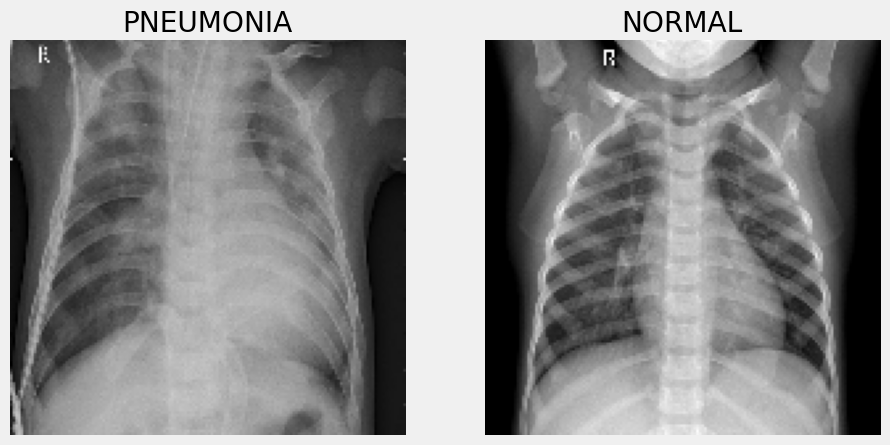

In [4]:
# ============================================================
# 1. Setup ambiente e librerie
# ============================================================

import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use("fivethirtyeight")
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten

print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

import warnings
warnings.filterwarnings('ignore')

# ============================================================
# 2. Configurazione Kaggle API (dopo upload di kaggle.json)
# ============================================================

# Carica kaggle.json dal tuo PC (Downloads)
from google.colab import files
files.upload()   # seleziona kaggle.json

# Sposta kaggle.json nella cartella corretta
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verifica che funzioni
!kaggle datasets list -s chest-xray

# ============================================================
# 3. Download ed estrazione dataset
# ============================================================

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p ./data/
!unzip -q ./data/chest-xray-pneumonia.zip -d ./data/

# ============================================================
# 4. Definizione dei path
# ============================================================

data_dir_train = pathlib.Path("data/chest_xray/train")
data_dir_test  = pathlib.Path("data/chest_xray/test")
data_dir_val   = pathlib.Path("data/chest_xray/val")

print("Number of Images in Train:", len(list(data_dir_train.glob("*/*.jpeg"))))
print("Number of Images in Test:", len(list(data_dir_test.glob("*/*.jpeg"))))
print("Number of Images in Validation:", len(list(data_dir_val.glob("*/*.jpeg"))))

# ============================================================
# 5. Creazione dataset con image_dataset_from_directory
# ============================================================

height = 150
width = 150
batch_size = 16
seed = 42

train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=seed,
    validation_split=0.2,
    subset='training',
    image_size=(height,width),
    batch_size=batch_size)

val_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=seed,
    validation_split=0.2,
    subset='validation',
    image_size=(height,width),
    batch_size=batch_size)

test_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size=(height,width),
    batch_size=batch_size)

class_names = train_ds.class_names
print("Classi:", class_names)

# ============================================================
# 6. Visualizzazione di alcune immagini
# ============================================================

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10,8))
    for i in range(2):
        plt.subplot(1,2,i+1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.gist_gray)
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()
